# Test logistic regression to identify if a PDF is the two-phase or one-phase

Learn tensorflow 2.0 APIs and test the logistic regression.

## Import necessary modules

In [1]:
# python built-in libraries
import datetime

In [2]:
# conda installed libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

2021-09-12 16:06:22.925470: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [3]:
# local packages
import tfhelper.core as tfhelper

## Global Variables

In [4]:
# sampling
DATA_DIR = "../21st_create_pdfmixs/pdfs_two_phase/"
BATCH_SIZE = 4
THRESHOLD = 0.95
# training
LEARNING_RATE = 0.001
BETA1 = 0.9
BETA2 = 0.999
EPOCHS = 5
# saving
TIME_STAMP = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
SAVE_LOC = "./data/models/test_logistic_regression"
LOG_LOC = "./data/logs/fit/{}".format(TIME_STAMP)

## Obtain some example data

The data is a 209 data point PDF. The label is a one-hot 2 dim vector. `10` means major phase >= threshold, `01` means major phase <= threshold.

Here, we only want to test the code so we choose a small number of files as a test.

In [5]:
ms = tfhelper.MySequence(DATA_DIR, BATCH_SIZE, threshold=THRESHOLD)
ms.filenames = ms.filenames[:16]

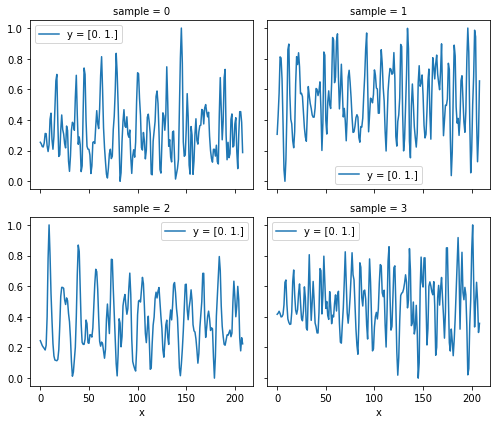

In [6]:
ms.visualize(0)

## Create the model

We use the logistric regression. It is a single layer with a softmax function.

In [7]:
def create_model():
    model = keras.Sequential()
    model.add(keras.Input(shape=(209,)))
    model.add(layers.Dense(2, activation="softmax"))
    return model

In [8]:
model = create_model()

2021-09-12 16:07:34.140380: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-09-12 16:07:34.141620: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-09-12 16:07:34.164984: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:87:00.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2021-09-12 16:07:34.165024: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-09-12 16:07:34.663594: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2021-09-12 16:07:34.663722: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.10

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 420       
Total params: 420
Trainable params: 420
Non-trainable params: 0
_________________________________________________________________


## Choose optimization method

In [10]:
model.compile(
    # Optimizer
    optimizer=keras.optimizers.Adam(LEARNING_RATE, BETA1, BETA2),
    # Loss function to minimize
    loss=keras.losses.CategoricalCrossentropy(),
    # List of metrics to monitor
    metrics=[keras.metrics.CosineSimilarity()],
)

## Train the model

Here, it is just a functional test. We only test 2 epochs to see if the code works or not.

In [11]:
# tensor board
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=LOG_LOC, histogram_freq=1)

2021-09-12 16:07:49.524469: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2021-09-12 16:07:49.524537: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2021-09-12 16:07:49.524589: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1365] Profiler found 1 GPUs
2021-09-12 16:07:49.747673: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcupti.so.10.1
2021-09-12 16:07:49.769936: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_INSUFFICIENT_PRIVILEGES
2021-09-12 16:07:49.775548: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.


In [12]:
history = model.fit(
    x=ms,
    epochs=EPOCHS,
    callbacks=[tensorboard_callback]
)

2021-09-12 16:07:50.391222: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-09-12 16:07:50.392177: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2194860000 Hz


Epoch 1/5


2021-09-12 16:07:50.727603: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


2/4 [==============>...............] - ETA: 0s - loss: 0.6995 - cosine_similarity: 0.7013

2021-09-12 16:07:53.238472: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2021-09-12 16:07:53.238519: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2021-09-12 16:07:53.239421: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_INSUFFICIENT_PRIVILEGES
2021-09-12 16:07:53.364212: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2021-09-12 16:07:53.365248: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 0 callback api events and 0 activity events. 
2021-09-12 16:07:53.366052: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2021-09-12 16:07:53.370567: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: ./data/logs/fit/20210912-160728/train/plug

4/4 [==============================] - 3s 107ms/step - loss: 0.7184 - cosine_similarity: 0.6891
Epoch 2/5
4/4 [==============================] - 0s 38ms/step - loss: 0.6413 - cosine_similarity: 0.7412
Epoch 3/5
4/4 [==============================] - 0s 37ms/step - loss: 0.6448 - cosine_similarity: 0.7390
Epoch 4/5
4/4 [==============================] - 0s 37ms/step - loss: 0.5208 - cosine_similarity: 0.8163
Epoch 5/5
4/4 [==============================] - 0s 37ms/step - loss: 0.5358 - cosine_similarity: 0.8065


## Save the model

In [13]:
model.save(SAVE_LOC)

2021-09-12 16:08:00.508378: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ./data/models/test_logistic_regression/assets
